In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [3]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
# this is where you specify the path to the main data folder
train=train_datagen.flow_from_directory('./train/', 
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        batch_size=64,
                                        class_mode='categorical',
                                        shuffle=True)

Found 197 images belonging to 3 classes.


In [7]:
#imports the mobilenet model and discards the last 1000 neuron layer(output).
base_model=MobileNet(weights='imagenet',include_top=False) 
x=base_model.output
x=GlobalAveragePooling2D()(x)
#we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation
model=Model(inputs=base_model.input,outputs=preds)

# making trainable layers
for layer in model.layers[:30]:
    layer.trainable=False
for layer in model.layers[30:]:
    layer.trainable=True

In [96]:
base_model.output

<tf.Tensor 'conv_pw_13_relu_1/Relu6:0' shape=(None, None, None, 1024) dtype=float32>

In [8]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [9]:
train.n, train.batch_size

(197, 64)

In [10]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#step_size_train=train.n//train.batch_size
model.fit_generator(generator=train,steps_per_epoch=6,epochs=5,verbose=2)

Epoch 1/5
 - 20s - loss: 0.9966 - accuracy: 0.5827
Epoch 2/5
 - 7s - loss: 0.2919 - accuracy: 0.8985
Epoch 3/5
 - 6s - loss: 0.1696 - accuracy: 0.9925
Epoch 4/5
 - 7s - loss: 0.0708 - accuracy: 0.9938
Epoch 5/5
 - 6s - loss: 0.0360 - accuracy: 1.0000


In [97]:
model.save('transfer.h5')

In [98]:
del model

In [100]:
from keras.models import load_model
model = load_model('transfer.h5')

In [101]:
category = {0:'CAT',1:'DOG',2:'HORSE'}

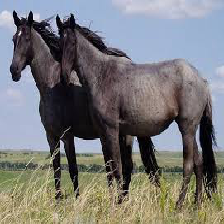

In [102]:
from keras.preprocessing import image

test_image = image.load_img('./train/horses/0.jpg', target_size = (224, 224))
test_image

In [103]:
test = image.img_to_array(test_image)
test = test/255
test_image = test.reshape(-1,224,224,3)
pred = model.predict(test_image)
print(category[np.argmax(pred)])

HORSE
